# Mobile Price Classification Using Machine Learning

In [3]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the Dataset
training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')
     

In [5]:
# Showing first 5 rows of training_data
training_data.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
# Showing first 5 rows of testing data
testing_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [8]:
# Showing No. of Rows and Columns of training_data and testing_data
print(training_data.shape) 
print(testing_data.shape) 

(2000, 21)
(1000, 21)


In [10]:
# Showing columns of the training_data 
training_data.columns
     

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
# Showing columns of testing_data
testing_data.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [12]:

# Checking data types of training_data and testing_data
print(training_data.dtypes)
print(testing_data.dtypes)

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object
id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g    

In [13]:
# checking duplicated values in training_data and testing_data
print(training_data.duplicated().sum())
print(testing_data.duplicated().sum())

# Hence no duplicate values found
     

0
0


In [14]:
# Checking null values in training data
training_data.isna().sum()
     

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [15]:
# Checking null values in testing data
testing_data.isna().sum()  # no null values found

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [16]:
# showing information about data
print(training_data.info())
print(testing_data.info())
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [17]:
# Statistical Summary of all numerical columns
training_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [18]:
# Showing statistical info. of numerical columns
testing_data.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [19]:
# Checking unique values in price_range column
training_data['price_range'].unique()


array([1, 2, 3, 0], dtype=int64)

Showing Relation Between Price Range and Different Features of Mobile Phones



1.Relationship Between battery_power and price_range


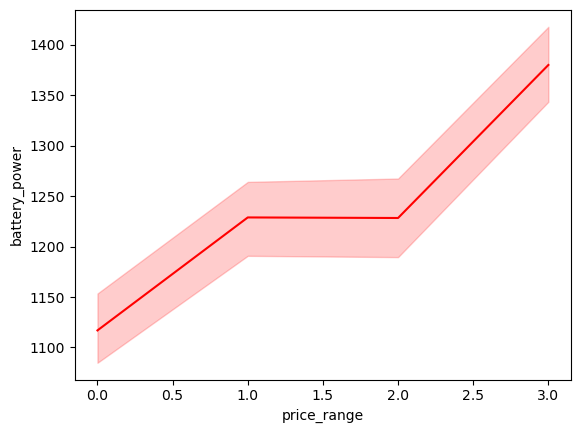

In [21]:
sns.lineplot(data = training_data ,x = 'price_range',y = 'battery_power' , color='red')
plt.show()  

This Plot Clearly Shows that with the rise in the price range the battery power also rises. but, when customer buy medium cost and high cost phone they are having same battery power.

2.Relationship Between price_range and ram

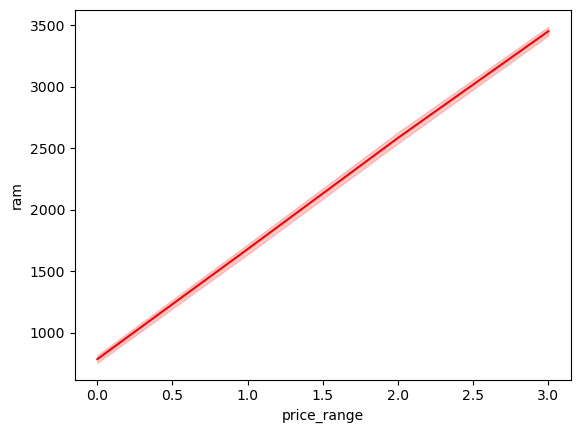

In [22]:
sns.lineplot(x = training_data['price_range'], y = training_data['ram'], color='red')
plt.show()

This Plot Clearly Shows with the increase in price range the ram for mobile phone also increases.



3.Relationship Between price_range and internal memory

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

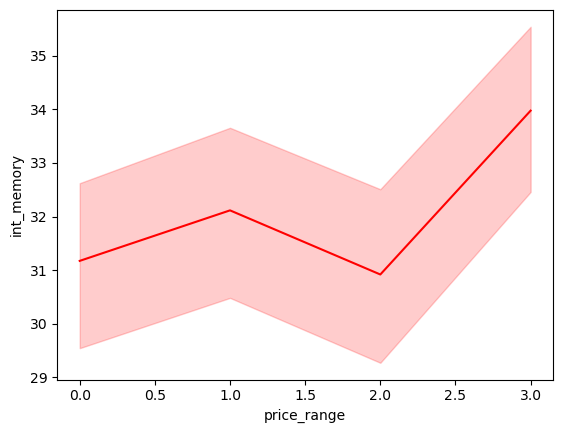

In [23]:
sns.lineplot(data = training_data , x='price_range', y='int_memory', color='red')


This Plot Shows that internal memory of mobile phone is not much correlated with price range. As when customer choose High Cost Mobile Phone it does not contain high internal memory.

### Relationship between Ram and different features of Mobile Phones on the basis of Price Range.

1.Relationship Between ram and touch_screen on the basis of price_range

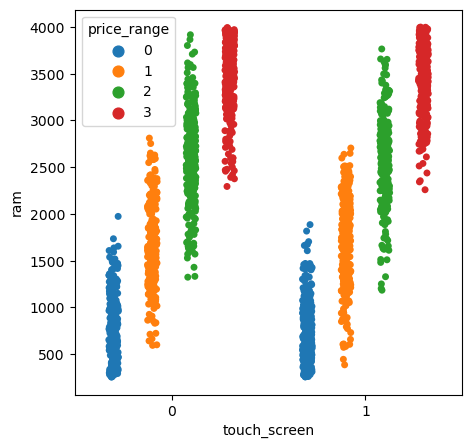

In [24]:
plt.figure(figsize=(5,5))
sns.stripplot(data = training_data , x='touch_screen', y='ram', hue='price_range', dodge=True)
plt.show()

2.Relation Between ram and three_g on the basis of price_range

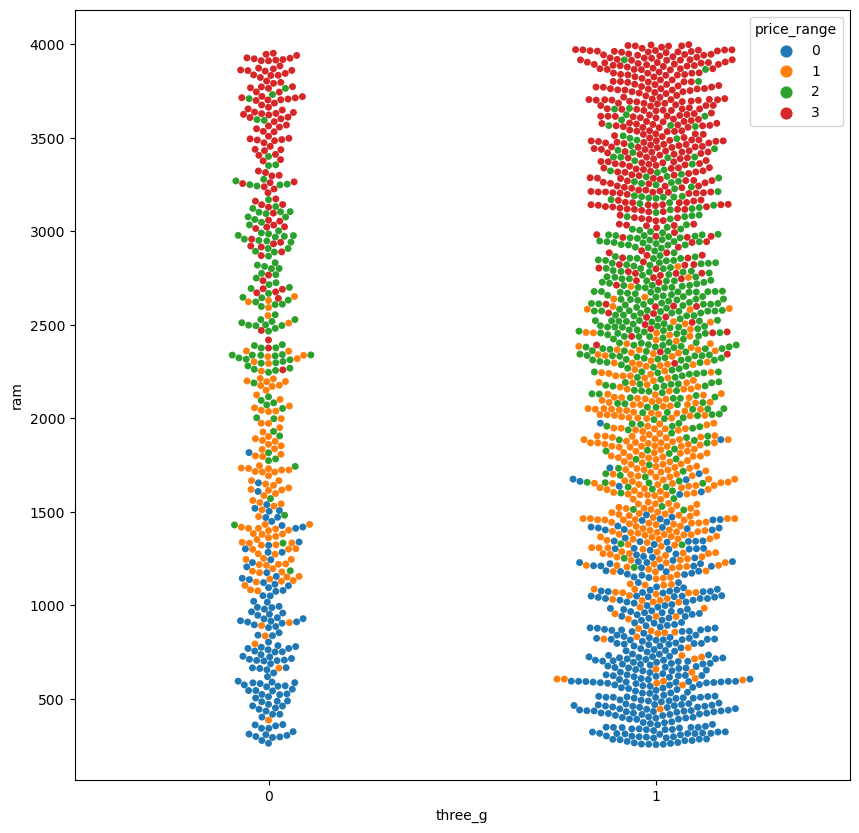

In [25]:
plt.figure(figsize=(10,10))
sns.swarmplot(data = training_data , x='three_g', y='ram', hue='price_range')
plt.show()

3.Relation Between four_g and ram on the basis of price_range

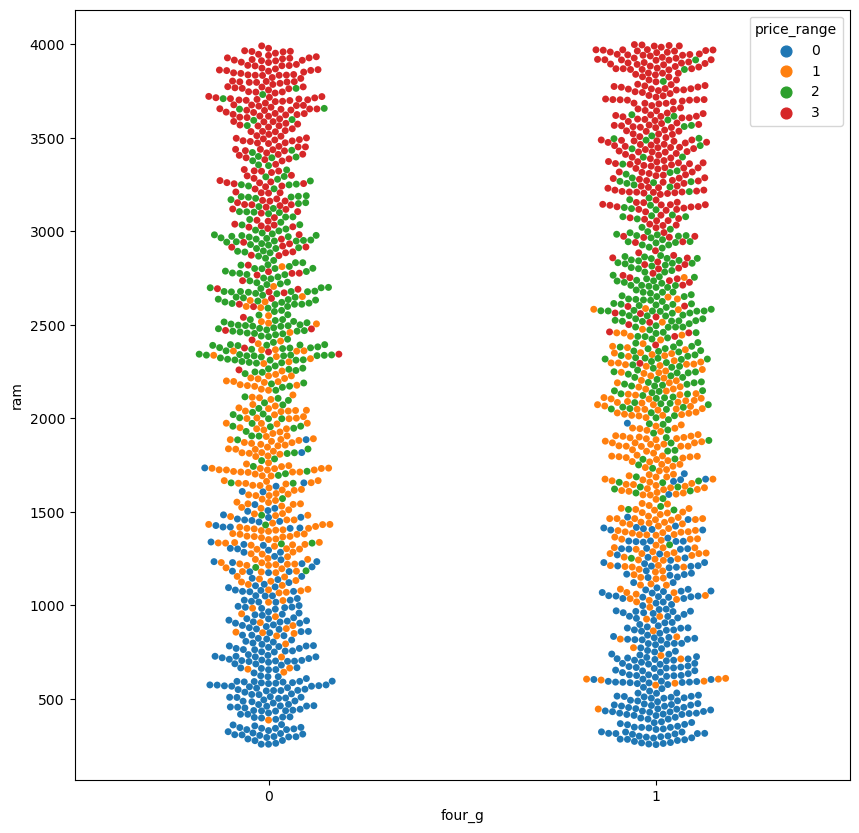

In [26]:
plt.figure(figsize=(10,10))
sns.swarmplot(data = training_data , x='four_g', y='ram', hue='price_range')
plt.show()

4.Relation Between ram and dual_sim on the basis of price range

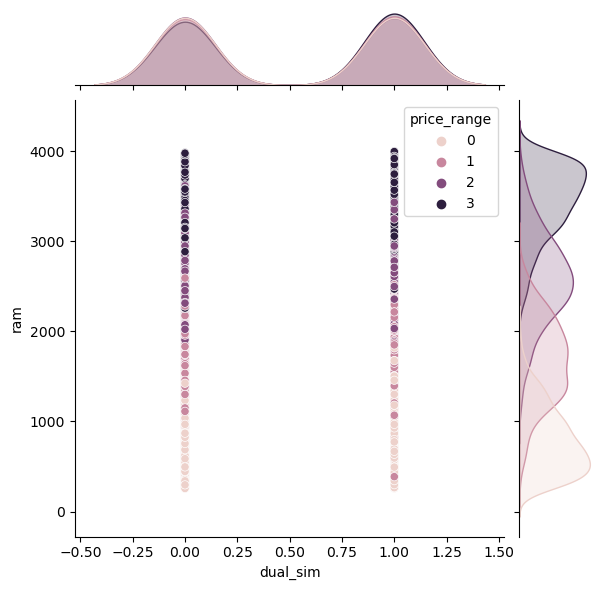

In [27]:
sns.jointplot(data=training_data , x='dual_sim', y='ram', hue='price_range')
plt.show()

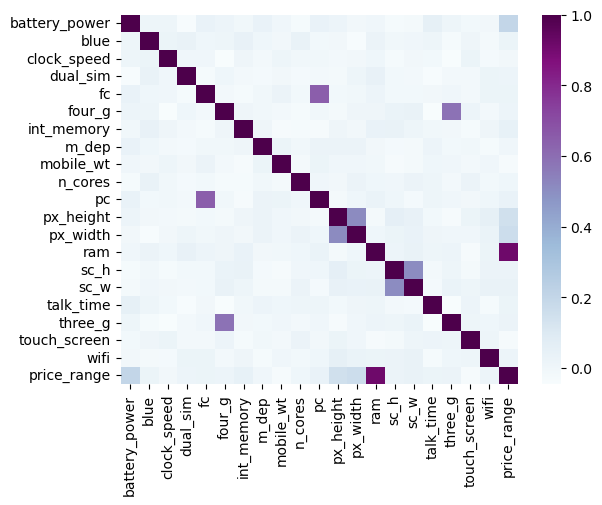

In [28]:
# Finding correlation and plotting Heatmap
corr = training_data.corr()
sns.heatmap(corr, cmap='BuPu')
plt.show()

This heatmap Clearly Shows -

1.Ram and Price_range are strongly correlated.

2.primary camera and front camera are highly correalted

3.3_G and 4_G are highly correlated

4.battery_power and price_range are not very correlated



### Checking for outliers

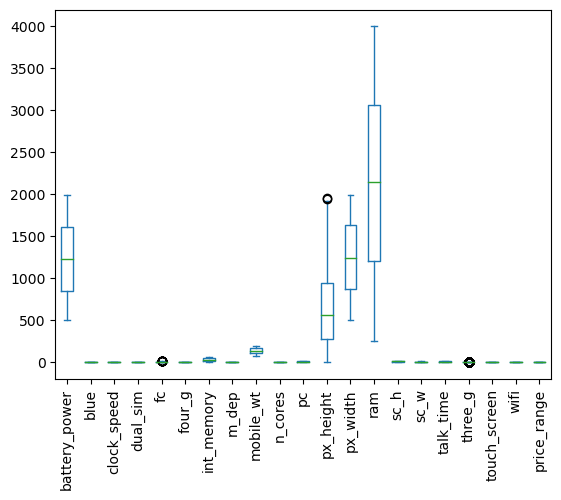

In [29]:
training_data.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

In [30]:
x = training_data.drop('price_range',axis=1)
y = training_data['price_range']

In [31]:
test_data = testing_data.drop('id',axis=1)

### Standardization and Normalization

In [32]:
std = StandardScaler()
x_std = std.fit_transform(x)

test_std = std.transform(test_data)

In [33]:
print(x_std)

[[-0.90259726 -0.9900495   0.83077942 ... -1.78686097 -1.00601811
   0.98609664]
 [-0.49513857  1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 [-1.5376865   1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 ...
 [ 1.53077336 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
  -1.01409939]
 [ 0.62252745 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
   0.98609664]
 [-1.65833069  1.0100505   0.58562134 ...  0.55964063  0.99401789
   0.98609664]]


In [34]:
print(test_std)

[[-0.44505984  1.0100505   0.34046327 ... -1.78686097  0.99401789
  -1.01409939]
 [-0.90487356  1.0100505  -1.2530642  ...  0.55964063 -1.00601811
  -1.01409939]
 [ 1.29403758  1.0100505   1.56625363 ... -1.78686097  0.99401789
   0.98609664]
 ...
 [-0.12182446 -0.9900495  -0.14985287 ...  0.55964063 -1.00601811
  -1.01409939]
 [ 0.67032987  1.0100505  -1.2530642  ... -1.78686097  0.99401789
  -1.01409939]
 [ 0.07166151  1.0100505  -1.2530642  ...  0.55964063 -1.00601811
   0.98609664]]


In [35]:
norm = MinMaxScaler()
x_norm = norm.fit_transform(x)
test_norm = norm.transform(test_data)

In [36]:
print(x_norm)

[[0.22778891 0.         0.68       ... 0.         0.         1.        ]
 [0.34736139 1.         0.         ... 1.         1.         0.        ]
 [0.04141617 1.         0.         ... 1.         1.         0.        ]
 ...
 [0.94188377 0.         0.16       ... 1.         1.         0.        ]
 [0.6753507  0.         0.16       ... 1.         1.         1.        ]
 [0.00601202 1.         0.6        ... 1.         1.         1.        ]]


In [37]:
print(test_norm)

[[0.36205745 1.         0.52       ... 0.         1.         0.        ]
 [0.22712091 1.         0.         ... 1.         0.         0.        ]
 [0.87241149 1.         0.92       ... 0.         1.         1.        ]
 ...
 [0.45691383 0.         0.36       ... 1.         0.         0.        ]
 [0.68937876 1.         0.         ... 0.         1.         0.        ]
 [0.51369405 1.         0.         ... 1.         0.         1.        ]]


## models

train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 20)
(400, 20)
(1600,)
(400,)


Logistic Regression

In [39]:
model = LogisticRegression()
# Standardized Data feeding to object that we have created
model.fit(x_std,y)

LogisticRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [40]:
model.predict(test_std)

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 3, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [41]:
model.fit(x_train,y_train)


LogisticRegression()

In [42]:
# Let's Make Prediction on training Data

prediction_training_data = model.predict(x_test)
print(prediction_training_data)

[0 2 0 3 1 2 3 0 3 3 0 1 2 3 3 2 2 2 1 0 0 1 0 2 1 1 3 3 3 0 1 0 3 0 2 3 2
 1 3 0 1 2 3 0 3 3 3 1 3 1 3 2 0 0 2 0 2 2 0 0 1 3 3 2 2 0 3 3 1 1 2 2 0 1
 2 0 0 3 1 2 3 2 1 0 1 3 3 3 3 0 3 3 3 0 3 2 2 3 2 1 0 1 0 0 0 3 3 0 0 1 0
 0 3 3 2 1 3 3 0 2 1 3 2 1 3 3 0 3 0 2 3 0 2 2 0 2 1 1 0 2 3 1 3 3 0 0 1 2
 1 2 3 1 2 0 2 3 0 1 0 1 3 3 2 2 1 0 0 2 1 3 3 1 0 0 3 1 1 2 0 1 0 0 0 1 3
 2 0 2 0 0 0 0 1 3 3 1 0 1 1 1 1 2 1 2 3 3 1 3 0 1 1 1 1 1 3 2 1 3 1 1 3 2
 3 0 0 3 0 2 0 0 1 0 2 3 2 1 0 2 3 1 3 3 2 3 0 3 2 2 2 3 3 1 1 3 2 1 2 3 3
 3 3 0 2 2 2 2 3 0 3 3 2 2 2 0 1 3 0 2 3 1 3 1 1 2 0 3 0 0 3 0 1 2 3 2 2 0
 1 0 0 3 3 0 1 1 2 0 3 3 3 3 1 3 2 0 3 2 3 2 0 0 1 3 2 3 1 1 2 0 3 3 2 0 2
 2 1 2 3 1 0 3 1 2 2 1 1 1 2 2 3 3 1 1 1 2 2 0 3 0 0 2 0 0 1 2 2 3 0 1 2 3
 3 3 2 3 1 2 0 2 1 3 3 0 1 3 2 3 2 3 1 0 3 2 0 0 3 3 1 2 3 2]


In [43]:
print(confusion_matrix(prediction_training_data, y_test))


[[79 17  0  0]
 [25 46 17  1]
 [ 1 20 46 29]
 [ 0  8 29 82]]


In [44]:
print(accuracy_score(prediction_training_data,y_test))


0.6325


In [45]:
print(classification_report(prediction_training_data,y_test))


              precision    recall  f1-score   support

           0       0.75      0.82      0.79        96
           1       0.51      0.52      0.51        89
           2       0.50      0.48      0.49        96
           3       0.73      0.69      0.71       119

    accuracy                           0.63       400
   macro avg       0.62      0.63      0.62       400
weighted avg       0.63      0.63      0.63       400



There is only 63% Accuracy So, we will try some other model

### KNeighborsClassifier

knn = KNeighborsClassifier()

In [47]:
knn.fit(x_std,y)

KNeighborsClassifier()

In [48]:
knn.predict(test_std)


array([2, 3, 1, 3, 2, 1, 3, 1, 2, 0, 3, 2, 0, 1, 3, 0, 1, 1, 3, 1, 1, 3,
       0, 0, 3, 2, 1, 0, 2, 0, 2, 2, 3, 0, 1, 1, 2, 0, 3, 2, 1, 1, 0, 0,
       0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 3, 1, 2, 2, 3, 2, 1, 1, 0, 0,
       1, 1, 1, 2, 0, 1, 3, 1, 3, 0, 1, 1, 1, 2, 0, 2, 3, 1, 2, 0, 2, 1,
       1, 1, 2, 3, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 3, 1, 2, 1, 1, 2, 2,
       3, 0, 1, 3, 3, 2, 3, 2, 2, 2, 0, 3, 3, 2, 1, 1, 2, 2, 2, 2, 0, 1,
       1, 1, 3, 2, 2, 0, 3, 2, 0, 2, 1, 3, 3, 2, 2, 2, 2, 1, 3, 1, 1, 2,
       1, 1, 3, 3, 2, 0, 2, 2, 2, 3, 3, 3, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       2, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 3, 0, 1, 2, 2,
       1, 2, 0, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 3, 3, 2, 0, 2, 0, 3,
       1, 0, 3, 1, 0, 2, 0, 1, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 3, 0, 2, 0,
       0, 2, 1, 2, 3, 2, 1, 1, 2, 0, 0, 2, 2, 3, 0, 3, 3, 1, 3, 1, 0, 2,
       2, 3, 3, 0, 0, 0, 2, 3, 1, 0, 3, 2, 0, 3, 0, 2, 1, 0, 0, 3, 2, 3,
       2, 1, 1, 2, 3, 0, 3, 1, 2, 0, 1, 0, 1, 2, 1,

In [49]:
# Data feeding to object that we have created
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
predict_train_data = knn.predict(x_test)
print(predict_train_data)

[0 2 1 3 1 1 2 0 3 1 0 1 2 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 2 2 2 1 3 1 3 1 0 0 0 0 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 0 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 2 2 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 2 1 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 2 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 2 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 3 3 0 3 1 2 3 3 2 1 0 3 3 1 3 3 3
 3 3 0 2 2 2 1 3 0 2 3 2 2 2 1 0 1 0 3 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 3 2 3 1 0 1 0 1 3 3 0 3
 3 2 1 3 0 0 3 1 3 2 0 1 1 1 0 1 3 1 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 2 0 3 1 3 3 0 2 3 2 3 3 3 1 0 2 3 0 0 2 3 2 1 1 2]


In [51]:
# Evaluating the model
print(confusion_matrix(predict_train_data, y_test))

[[103   3   0   0]
 [  2  85   5   0]
 [  0   3  84   7]
 [  0   0   3 105]]


In [52]:
print(accuracy_score(predict_train_data,y_test))
print(classification_report(predict_train_data,y_test))

0.9425
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       106
           1       0.93      0.92      0.93        92
           2       0.91      0.89      0.90        94
           3       0.94      0.97      0.95       108

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



Hence this model is giving 94% Accuracy so, we finalize the knn model as best model

There is a final prediction of mobile price classification

In [53]:
prediction_test_data = knn.predict(test_data)
print(prediction_test_data)

[3 3 3 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2 1 3 1 1 3 0 2 0 3 0 2 0 3 0 1 1 3
 1 2 1 1 2 0 0 0 1 0 3 1 2 1 0 3 0 3 1 3 1 1 3 3 2 0 2 1 1 1 3 1 2 1 2 2 3
 3 0 2 0 2 3 0 3 3 0 3 0 3 1 2 0 1 2 2 1 2 2 0 1 1 2 1 0 0 3 0 2 0 1 2 3 3
 3 1 3 3 3 3 2 3 0 0 3 2 1 2 0 3 2 3 1 0 2 2 1 3 1 1 0 3 2 1 3 1 2 2 3 3 3
 2 3 2 3 1 0 3 2 3 3 3 3 2 2 3 3 3 3 1 0 3 0 0 0 2 1 0 1 0 0 1 2 1 0 0 1 1
 2 2 1 0 0 0 1 0 3 1 0 2 2 3 3 1 2 2 2 3 2 2 1 0 0 1 2 0 2 3 3 0 2 0 3 2 3
 3 1 0 1 0 3 0 1 0 2 2 1 2 0 3 0 3 1 2 0 0 2 1 3 3 3 1 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 0 0 2 3 2 1 3 2 0 3 0 0 2 0 0 3 2 3 3 2 1 3 3 2 3 1 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 1 2 0 0 0 1 3 2 0 0 0 3 2 0 2 3 1
 2 2 2 3 1 3 3 2 2 2 3 3 1 3 0 3 1 3 1 3 3 0 1 0 3 1 3 2 3 0 0 0 0 2 0 0 2
 2 1 2 2 2 0 1 0 0 3 2 0 3 1 2 2 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 1 0 1 0 0 1
 1 0 1 0 2 2 3 2 3 0 3 0 3 0 1 1 1 1 0 3 2 3 3 1 3 1 3 1 3 2 0 1 2 1 2 0 0
 0 1 2 1 0 3 2 0 2 2 0 0 3 1 2 1 2 3 3 0 3 0 2 3 3 3 0 2 0 2 3 0 1 1 0 0 1
 1 1 3 3 3 2 3 1 2 2 3 3 

In [ ]:
submitted by 
ABIN.K.PRAKASH